In [2]:
#Importing the Essential Libraries
import pandas as pa
import numpy as nm
import seaborn as sea
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# %matplotlib inline

In [3]:
#Importing some more important libraries
import re
import nltk
import string
#from nltk.util import pr
from nltk.corpus import stopwords

#Creating a stemmer and a set of stopwords
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

In [4]:
#Importing the Downloaded Dataset
data_frame = pa.read_csv("twitter_data.csv")
print(data_frame.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [5]:
#Mapping numerical class labels to text labels
label_mapping = {0:"Hate Speech Detected", 1:"Offensive Language Detected", 2:"No Hate or Offensive Speech"}
data_frame['labels'] = data_frame['class'].map(label_mapping)
print(data_frame.head(10))

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   
5           5      3            1                   2        0      1   
6           6      3            0                   3        0      1   
7           7      3            0                   3        0      1   
8           8      3            0                   3        0      1   
9           9      3            1                   2        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand

In [6]:
data_frame = data_frame[['tweet','labels']]
data_frame.head(10)

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",Offensive Language Detected
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",Offensive Language Detected
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,Offensive Language Detected
8,""" &amp; you might not get ya bitch back &amp; ...",Offensive Language Detected
9,""" @rhythmixx_ :hobbies include: fighting Maria...",Offensive Language Detected


In [7]:
#Now, Creating a function to clean text
def wordopt(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [8]:
data_frame["tweet"] = data_frame["tweet"].apply(wordopt)
print(data_frame.head(10))

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   
5  tmadisonx shit blow meclaim faith somebodi sti...   
6  brighterday sit hate anoth bitch  got much shi...   
7             caus im tire big bitch come us skinni    
8              amp might get ya bitch back amp that    
9           rhythmixx hobbi includ fight mariambitch   

                        labels  
0  No Hate or Offensive Speech  
1  Offensive Language Detected  
2  Offensive Language Detected  
3  Offensive Language Detected  
4  Offensive Language Detected  
5  Offensive Language Detected  
6  Offensive Language Detected  
7  Offensive Language Detected  
8  Offensive Language Detected  
9  Offensive Language Detected  


In [9]:
#Dropping all rows containing the NaN values
data_frame = data_frame.dropna()

In [10]:
#Converts these columns into Numpy Arrays
x = nm.array(data_frame["tweet"])
y = nm.array(data_frame["labels"])

In [11]:
#Converting a Collection of text documents into a matrix (represent numerically)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
xv = cv.fit_transform(x)

#Splitting the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(xv, y, test_size=0.33, random_state=42)

In [12]:
#Providing the no. of rows and columns for train and test dataset each
X_train.shape, X_test.shape

((16604, 25693), (8179, 25693))

In [13]:
#Creating the model using Decision Tree Algorithm (best suitable)
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

#Training the model with the train data
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
#Checking the accuracy score of the model on the given test dataset
pred_dt = DT.predict(X_test)
accuracy_score(y_test, pred_dt)

0.8738232057708767

In [15]:
print(classification_report(y_test, pred_dt))

                             precision    recall  f1-score   support

       Hate Speech Detected       0.37      0.33      0.35       465
No Hate or Offensive Speech       0.80      0.83      0.81      1379
Offensive Language Detected       0.92      0.92      0.92      6335

                   accuracy                           0.87      8179
                  macro avg       0.70      0.69      0.69      8179
               weighted avg       0.87      0.87      0.87      8179



Text(113.9222222222222, 0.5, 'Predicted Label')

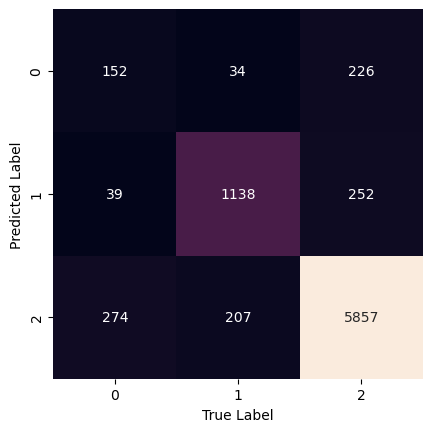

In [16]:
# Creating it's confusion matrix and heat map
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(y_test, pred_dt)
sea.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False)

# Plotting Heatmap of Confusion Matrix
mpl.xlabel('True Label')
mpl.ylabel('Predicted Label')

In [17]:
#Predicting kind of speech on new data based on trained model
def predict_text(test_text):
    data = cv.transform([test_text]).toarray()
    prediction = DT.predict(data)
    return prediction

In [18]:
print(predict_text("i will kill you"))

['Hate Speech Detected']


In [19]:
print(predict_text("you are awesome"))

['No Hate or Offensive Speech']


In [20]:
print(predict_text("you are bad and i don't like you"))

['Offensive Language Detected']


In [21]:
print(predict_text("the cars outside are beautiful"))

['No Hate or Offensive Speech']


In [22]:
print(predict_text("you are dirty and smell like a rotten egg"))

['Offensive Language Detected']
